# 플라스틱 증가 예측 모델링

## 데이터 로드 및 전처리

In [1]:
pla = pd.read_csv("Plastic_amount_2008_2013.csv")
stic = pd.read_csv("전국_Final_Plastic_volumn_of_garbage.csv")

In [2]:
# 날짜 컬럼 생성
pla["year"] = pd.to_datetime([
    "2008-01-01", "2009-01-01", "2010-01-01", "2011-01-01", "2012-01-01", "2013-01-01"
])
stic["year"] = pd.to_datetime([
    "2014-01-01", "2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01"
])

In [3]:
# prophet 사용이 가능한 데이터 프레임 형태로 변환
stic = stic[["year", "p_total"]]
stic.rename(columns=({"year":"ds", "p_total":"y"}),
                  inplace=True)
pla.rename(columns=({"total_p":"y", "year":"ds"}), inplace=True)

In [4]:
# 합쳐주기
plastic = pd.concat([pla,stic], axis=0)

In [5]:
plastic.reset_index(inplace=True, drop=True)
plastic

,y,ds
0,4286.506956,2008-01-01
1,4268.700000,2009-01-01
2,3990.700000,2010-01-01
3,3949.730000,2011-01-01
4,4387.500000,2012-01-01
5,4365.400000,2013-01-01
6,4606.760000,2014-01-01
7,4938.600000,2015-01-01
8,5445.600000,2016-01-01
9,5852.300000,2017-01-01


## 2019년도 쓰레기 양 예측
- 예측을 하는 이유 : 현재 2019년도의 쓰레기 배출량 집계된 것이 없기 때문에 trend를 반영할 수 있는 것으로 사용

### Holt's Exponential Smoothing¶
- trend로 데이터를 예측하기 위해 Simple Exponential Smoothing에서 확장한 것이다.
- 예측을 위한 식 외에 level smoothing을 위한 식과 trend smoothing을 위한 식이 포함된다
- 생성된 예측은 선형적으로 나타나기 때문에 예측 범위가 멀어질 수록 over-forecast 되는 경향이 있다.

In [6]:
from statsmodels.tsa.api import Holt

In [7]:
holt_model = Holt(np.array(plastic.y))
holt_result = holt_model.fit()
holt_pred = holt_result.forecast(1)

/Users/yeonsu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [8]:
holt_pred

array([6851.90926107])

**< Holt's Exponential Smoothing 사용 시 결과 >**
 - 2019를 6851.90926107로 예측함
 ---

## 2019, 2020 포함 된 데이터 생성
 - Prophet과 Holt를 사용한 예측 값이 다르기 때문에, 우선 2개 모두 진행 예정
 - 2020년 배출량의 경우, 코로나로 인해 2019년 동기 대비 플라스틱 배출량이 15% 늘었다는 환경부 통계 기사를 바탕으로 산출

In [9]:
holt_plastic = pd.DataFrame([
    {"y": 6851.90926107, "ds" : pd.to_datetime("2019-01-01")},
    {"y": 6851.90926107 * 1.15 , "ds" : pd.to_datetime("2020-01-01")}
])

In [10]:
holt_plastic = pd.concat([plastic, holt_plastic], axis=0)

In [11]:
holt_plastic.reset_index(inplace=True, drop=True)

In [12]:
holt_plastic

,y,ds
0,4286.506956,2008-01-01
1,4268.700000,2009-01-01
2,3990.700000,2010-01-01
3,3949.730000,2011-01-01
4,4387.500000,2012-01-01
5,4365.400000,2013-01-01
6,4606.760000,2014-01-01
7,4938.600000,2015-01-01
8,5445.600000,2016-01-01
9,5852.300000,2017-01-01


## 앞으로의 3년 예측해보기

### Holt's Exponential Smoothing

In [13]:
holt_model = Holt(np.array(holt_plastic.y))
holt_result = holt_model.fit()
holt_pred = holt_result.forecast(3)

In [14]:
list(holt_pred)

[8526.357796410188, 9312.279239806221, 10098.200683202256]

In [15]:
holt_plastic_new = pd.concat([holt_plastic, pd.DataFrame({"y" : list(holt_pred), 
             "ds" : pd.to_datetime(["2021-01-01", "2022-01-01", "2023-01-01"])})], axis=0)
holt_plastic_new.reset_index(inplace=True, drop=True)
holt_plastic_new

,y,ds
0,4286.506956,2008-01-01
1,4268.700000,2009-01-01
2,3990.700000,2010-01-01
3,3949.730000,2011-01-01
4,4387.500000,2012-01-01
5,4365.400000,2013-01-01
6,4606.760000,2014-01-01
7,4938.600000,2015-01-01
8,5445.600000,2016-01-01
9,5852.300000,2017-01-01


## 코로나를 고려하지 않은 2023년도까지의 쓰레기양 예측

### Holt's Exponential Smoothing

In [16]:
holt_model = Holt(np.array(plastic.y))
holt_result = holt_model.fit()
holt_pred = holt_result.forecast(5)

/Users/yeonsu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [17]:
holt_pred

holt_plastic_nocovid = pd.concat([plastic, pd.DataFrame({"y" : list(holt_pred), 
             "ds" : pd.to_datetime(["2019-01-01", "2020-01-01",
                                    "2021-01-01", "2022-01-01", "2023-01-01"])})], axis=0)
holt_plastic_nocovid.reset_index(inplace=True, drop=True)
holt_plastic_nocovid

,y,ds
0,4286.506956,2008-01-01
1,4268.700000,2009-01-01
2,3990.700000,2010-01-01
3,3949.730000,2011-01-01
4,4387.500000,2012-01-01
5,4365.400000,2013-01-01
6,4606.760000,2014-01-01
7,4938.600000,2015-01-01
8,5445.600000,2016-01-01
9,5852.300000,2017-01-01


## 비교

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams['font.family'] = 'AppleGothic'

Text(0.5, 1.0, '[ 코로나 발생 / 미발생 가정 폐플라스틱 발생 예측 (단위 : 톤/일)]')

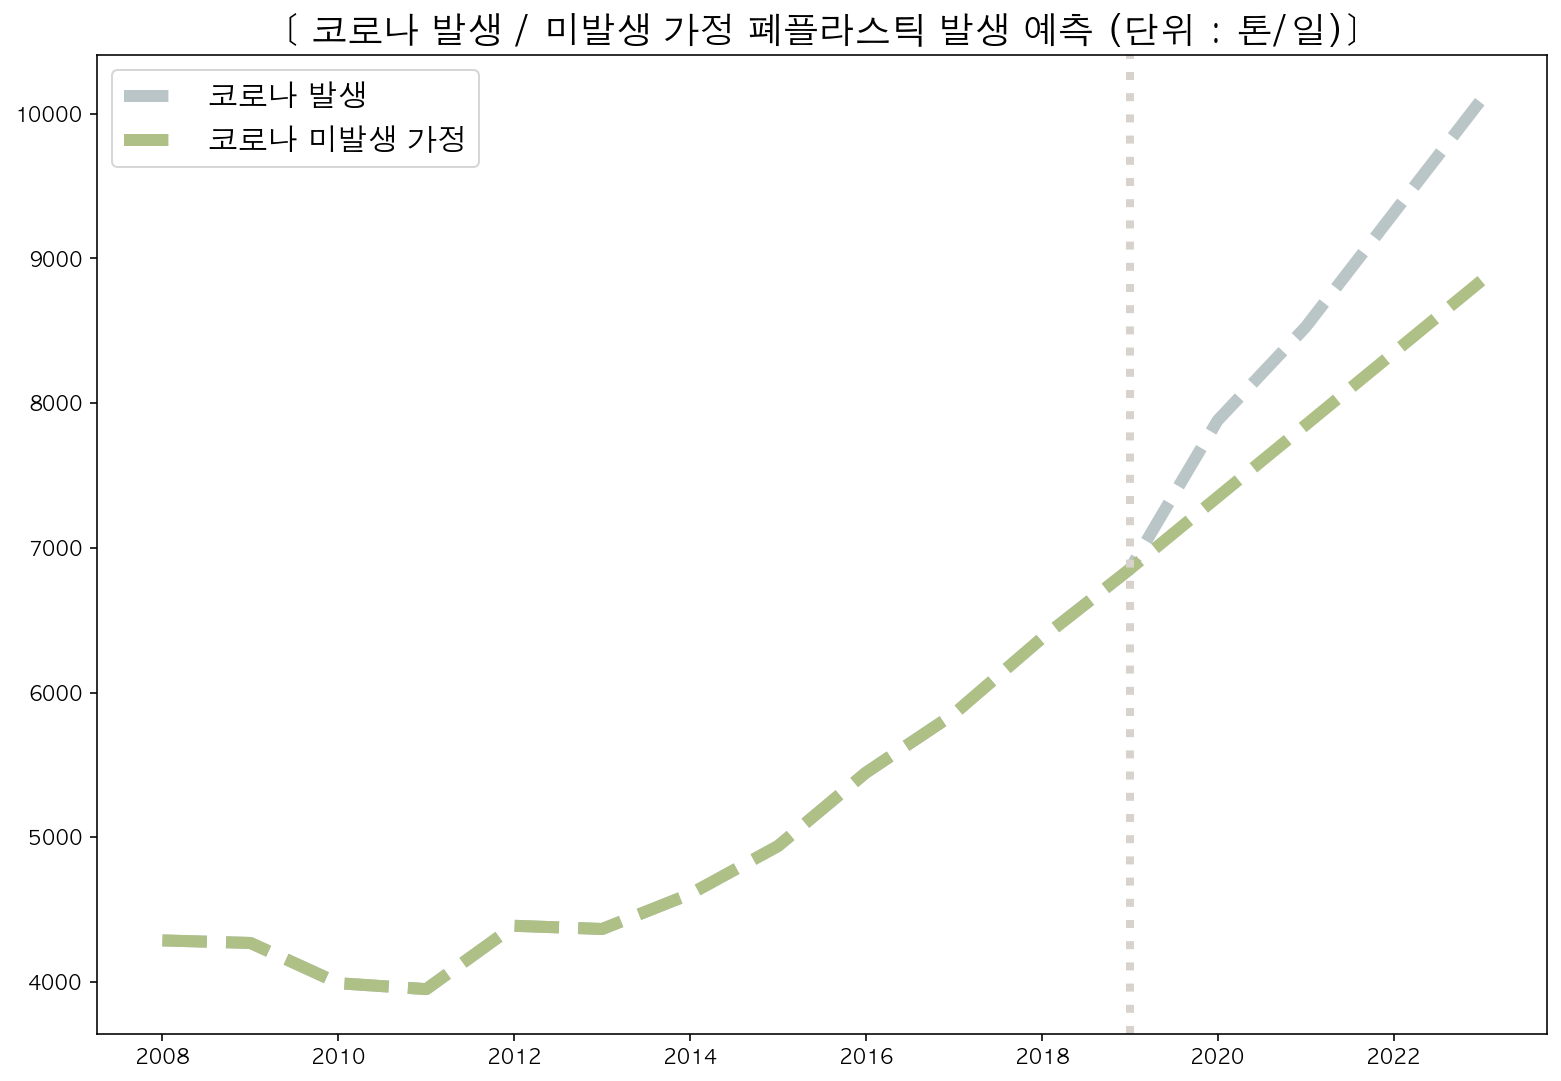

In [34]:
plt.figure(figsize=(13,9))
plt.plot(holt_plastic_new["ds"], holt_plastic_new["y"], ls='--', 
         color = "#B9c5c7", linewidth=6)
plt.plot(holt_plastic_nocovid["ds"], holt_plastic_nocovid["y"], ls='--', 
         color = "#aec086", linewidth=6)
plt.axvline(x=pd.to_datetime("2019-01-01"), color="#d7d2cc", linestyle=':', linewidth=4)
plt.legend(["코로나 발생", "코로나 미발생 가정"], fontsize=15)
plt.title("[ 코로나 발생 / 미발생 가정 폐플라스틱 발생 예측 (단위 : 톤/일)]", fontsize=18)